In [1]:
!pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# fetch dataset
magic_gamma_telescope = fetch_ucirepo(id=159)

# data (as pandas dataframes)
X = magic_gamma_telescope.data.features
y = magic_gamma_telescope.data.targets

In [3]:
df=pd.DataFrame(X)
df['class']=y
df["class"]=(df["class"]=='g').astype(int)
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [4]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [5]:
from sklearn.preprocessing import StandardScaler

def scale_dataset(df, oversample=False):
  X=df[df.columns[:-1]].values
  y=df[df.columns[-1]].values
  scaler=StandardScaler()
  X=scaler.fit_transform(X)
  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data=np.hstack((X, np.reshape(y, (-1,1))))
  return data

In [6]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
11381,62.5927,35.2466,3.3442,0.3622,0.2057,29.3027,39.8251,21.9907,3.1921,360.0810,1
17575,140.7960,87.5776,3.4786,0.2362,0.1354,-156.3340,-100.4590,-113.2210,35.5340,308.2850,0
1241,25.0768,19.7139,2.6632,0.4061,0.2313,0.2771,17.8255,12.4723,65.2260,5.7456,1
6112,72.3442,21.5212,3.3645,0.1841,0.1005,30.2612,68.3836,-9.6461,0.7230,246.4220,1
386,18.0693,9.6759,2.3598,0.7162,0.3996,-19.5487,-12.7659,6.8677,84.2593,185.5650,1
...,...,...,...,...,...,...,...,...,...,...,...
16002,19.4632,10.5655,2.4048,0.6181,0.3720,7.1088,-16.5797,9.3113,64.5190,166.1830,0
17942,139.1430,89.1839,3.6977,0.1659,0.0938,-0.2938,-127.2560,-61.0442,74.7645,337.4880,0
5757,42.0042,20.9915,3.1136,0.2710,0.1474,-59.8072,18.9253,-6.2432,7.6720,268.3310,1
1715,17.4823,10.9852,2.2380,0.5665,0.2861,2.6567,-8.5761,-4.2740,35.7580,130.5390,1


In [7]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(train[train.columns[:-1]], train[train.columns[-1]])

In [8]:
# Modified code for ipython-input-35-51df2ea4bb13
# Original:
# train, x_train, y_train = scale_dataset(train, oversample=True)
# valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
# test, x_test, y_test = scale_dataset(test, oversample=False)


# Updated code:
train_data = scale_dataset(train, oversample=True)
valid_data = scale_dataset(valid, oversample=False)
test_data = scale_dataset(test, oversample=False)

# Extracting X and y from the returned data
x_train = train_data[:, :-1]  # Select all columns except the last one
y_train = train_data[:, -1]   # Select only the last column
x_valid = valid_data[:, :-1]
y_valid = valid_data[:, -1]
x_test = test_data[:, :-1]
y_test = test_data[:, -1]

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
y_pred = knn_model.predict(x_test)
y_pred

array([0., 1., 1., ..., 1., 0., 0.])

In [11]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model=nb_model.fit(x_train, y_train)

In [12]:
from sklearn.linear_model import LogisticRegression

lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train, y_train)

In [13]:
from sklearn.svm import SVC

svm_model=SVC()
svm_model=svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      1290
         1.0       0.89      0.89      0.89      2514

    accuracy                           0.85      3804
   macro avg       0.83      0.83      0.83      3804
weighted avg       0.85      0.85      0.85      3804



In [14]:
def plot_history(history):
    fig, (ax1,ax2)= plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.grid(True)

    plt.show()

In [15]:
import tensorflow as tf

def train_model(x_train, y_train, num_node,lr, batch_size, epochs):
  inputs = tf.keras.Input(shape=(10,))
  nn_model= tf.keras.Sequential([
      inputs,
      tf.keras.layers.Dense(num_node, activation='relu',),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_node, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history=nn_model.fit(x_train, y_train, batch_size=batch_size,verbose=0, epochs=epochs, validation_split=0.2)
  return nn_model, history

num_node=32
dropout_prob=0.2
lr=0.001
batch_size=32
epochs=10

nn_model, history=train_model(x_train, y_train, num_node, lr, batch_size, epochs)

In [16]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)  # Enable probability estimates
svm_model = svm_model.fit(x_train, y_train)

In [39]:
y_proba = svm_model.predict_proba(x_test)[:, 1]  # Probabilidade de classe 'Gamma'
threshold = 0.8  # Ajustar o threshold
y_pred_threshold = (y_proba > threshold).astype(int)

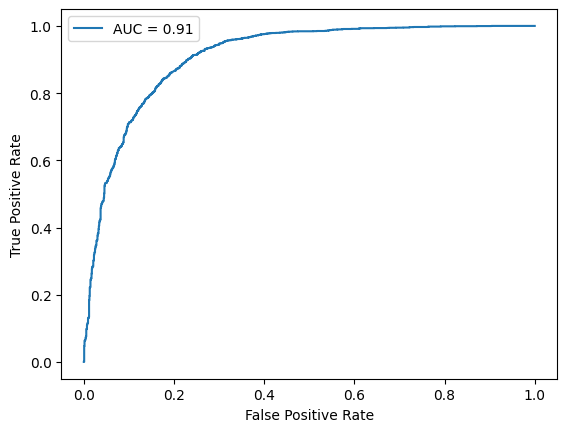

In [40]:
from sklearn.metrics import roc_curve, auc

y_proba = svm_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [19]:
svm_model = SVC(class_weight='balanced')  # Ajusta pesos automaticamente
svm_model.fit(x_train, y_train)


SVC(class_weight='balanced')

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'class_weight': ['balanced', None]}
grid = GridSearchCV(LogisticRegression(), param_grid, scoring='f1', cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced', None]},
             scoring='f1')

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79      1290
         1.0       0.88      0.91      0.89      2514

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



In [23]:
svm_model = SVC(class_weight='balanced', probability=True)  # Add probability=True
svm_model.fit(x_train, y_train)

SVC(class_weight='balanced', probability=True)

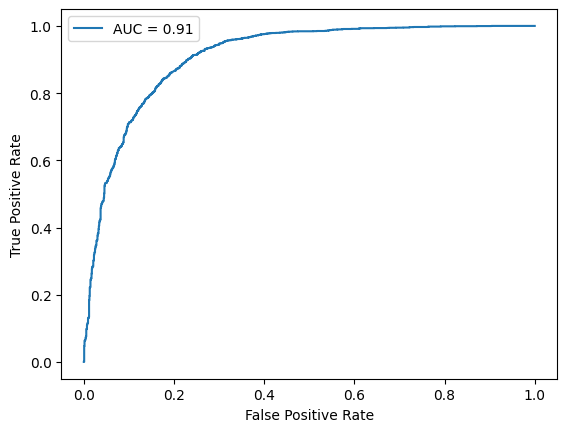

In [24]:
from sklearn.metrics import roc_curve, auc

y_proba = svm_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [42]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(y_true, y_prob, threshold):
  """
  Calcula a acurácia para um determinado valor de threshold.

  Args:
    y_true: Os valores reais das classes.
    y_prob: As probabilidades preditas para a classe positiva.
    threshold: O valor do threshold.

  Returns:
    A acurácia para o threshold dado.
  """
  y_pred = (y_prob > threshold).astype(int)
  accuracy = accuracy_score(y_true, y_pred)
  return accuracy

In [44]:
y_prob = svm_model.predict_proba(x_test)[:, 1]
threshold = 0.6
accuracy = calculate_accuracy(y_test, y_prob, threshold)
print(f"Acurácia para threshold {threshold}: {accuracy}")

Acurácia para threshold 0.6: 0.8259726603575184


In [49]:

best_val_ac= 0
val_ac=0
best_threshold=0

for threshold in [0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9]:
  calculate_accuracy(y_test, y_prob,threshold)
  val_ac=calculate_accuracy(y_test, y_prob,threshold)
  print(threshold,val_ac)
  if val_ac >= best_val_ac:
    best_val_ac=val_ac
    best_threshold=threshold
print('best threshold:', best_threshold, "roc_acc:", calculate_accuracy(y_test, y_prob,best_threshold))


0.1 0.8317560462670873
0.2 0.8567297581493165
0.3 0.86198738170347
0.4 0.8567297581493165
0.5 0.8427970557308097
0.6 0.8259726603575184
0.7 0.7944269190325972
0.8 0.7337013669821241
0.9 0.5938485804416404
best threshold: 0.3 roc_acc: 0.86198738170347
